In [2]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

2023-07-03 11:14:58.575693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs2-pars_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs2-pars_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

idx = 0
nset=10000

(100000, 7)
(100000, 100)
(100,)


In [4]:


testset= np.asarray(refl[-nset:])
testsetout= np.asarray(pars[-nset:])
testpars = np.asarray (pars[-nset:])


In [7]:
import importlib
importlib.reload(models)
n_data = refl.shape[0]
n_features = refl.shape[1]
n_outputs = 7

encoder=models.cnn_encoder(n_data, n_features, n_outputs)
encoder.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
history = encoder.fit(refl, pars,
                        epochs=20, batch_size=2056,
                        validation_data=(testset, testsetout))

2023-07-02 13:58:12.667247: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
49/49 [==============================] - 9s 177ms/step - loss: 0.2902 - val_loss: 0.2451
Epoch 2/20
49/49 [==============================] - 8s 160ms/step - loss: 0.2347 - val_loss: 0.2210
Epoch 3/20
49/49 [==============================] - 8s 156ms/step - loss: 0.2177 - val_loss: 0.2100
Epoch 4/20
49/49 [==============================] - 8s 160ms/step - loss: 0.2091 - val_loss: 0.2032
Epoch 5/20
49/49 [==============================] - 8s 166ms/step - loss: 0.2020 - val_loss: 0.1965
Epoch 6/20
49/49 [==============================] - 8s 157ms/step - loss: 0.1959 - val_loss: 0.1904
Epoch 7/20
49/49 [==============================] - 8s 159ms/step - loss: 0.1891 - val_loss: 0.1842
Epoch 8/20
49/49 [==============================] - 9s 174ms/step - loss: 0.1850 - val_loss: 0.1805
Epoch 9/20
49/49 [==============================] - 7s 144ms/step - loss: 0.1785 - val_loss: 0.1744
Epoch 10/20
49/49 [==============================] - 8s 157ms/step - loss: 0.1761 - val_loss: 0.1720

In [8]:
importlib.reload(models)
data_dir = os.path.expanduser("~/git/machine_learning/data")
models.save_model(encoder, "twolayerpars", data_dir)

In [6]:
importlib.reload(models)
data_dir = os.path.expanduser("~/git/machine_learning/data")

In [7]:
model=models.load_model("twolayerpars", data_dir)
idx=0

2023-07-03 11:15:33.334770: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
pars=encoder.predict(testset)


NameError: name 'encoder' is not defined

In [11]:
preds=model.predict(refl)

In [12]:
idx=0

In [13]:
print (pars[idx])
print(testsetout[idx])
idx+=1

[-0.09560294 -0.26584396 -0.19563372  0.39993346 -0.45884943  0.3195661
  0.6401187 ]
[-0.5306515  -0.23764937 -0.80548256  0.44223432 -0.41918583  0.72816396
  0.5038983 ]


(100000, 7)


Text(0.5, 0, 'a for index 1')

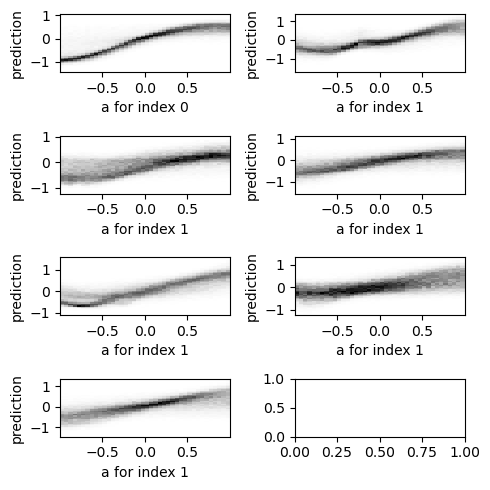

In [13]:
n_bins=40
print(pars.shape)
fig, axs= plt.subplots(4,2, sharey=False, tight_layout= True, dpi=100, figsize= (5,5))
true_values=pars
ax=plt.subplot(4, 2, 1)
ax.hist2d(true_values[:,0], preds[:,0], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 0')

ax=plt.subplot(4, 2, 2)
ax.hist2d(true_values[:,1], preds[:,1], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

ax=plt.subplot(4, 2, 3)
ax.hist2d(true_values[:,2], preds[:,2], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 4)
ax.hist2d(true_values[:,3], preds[:,3], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 5)
ax.hist2d(true_values[:,4], preds[:,4], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 6)
ax.hist2d(true_values[:,5], preds[:,5], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 7)
ax.hist2d(true_values[:,6], preds[:,6], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

